In [ ]:
import os
import cv2
from scipy.spatial import procrustes

import numpy as np
import pandas as pd

target_dir = "../data/single_sungaya/"

out_df = pd.read_hdf("../data/single_sungaya/Data_3D_Pose.hdf5")
out_df

In [ ]:
out_df = pd.read_hdf("../data/single_sungaya/Data_3D_Pose.hdf5")
array_3d = np.array(out_df['key_points_3D'].to_numpy())

for x in range(len(array_3d)):
    array_3d[x] = np.array(array_3d[x])

fixed_array_3d = np.empty((3778,186))

for x in range(len(fixed_array_3d)):
    z = array_3d[x].reshape(1,186)
    fixed_array_3d[x] = z

fixed_array_3d=fixed_array_3d.reshape((3778,62,3))


In [ ]:
avg= 0
disp=[]
for i in range(len(fixed_array_3d)):
    for j in range(i+1, len(fixed_array_3d)):  
        if fixed_array_3d[i].all() != 0 and fixed_array_3d[j].all() != 0:
            _,_,dis =procrustes(fixed_array_3d[i], fixed_array_3d[j])
            
            avg += dis
            disp.append(dis)


In [ ]:
print("Spacial disparity Avg:", avg/len(disp))
# disp

In [59]:
parts_str = ["Body","L_1","L_2", "L_3", "R_1","R_2","R_3", "L_A", "R_A"]
reduced_kp = [[0,2,3,6], [7,10,13], [14,17,20 ], [21,24,27], [28,31,34], [35,38,41], [42,45,48],  [52,54,55], [58,60,61]]
# fixed_array_3d=fixed_array_3d[:,reduced_kp]
fixed_array_3d[:,reduced_kp[0]].shape

(3778, 4, 3)

In [57]:
avgs = []
for parts in range(len(reduced_kp)):
    p_avg =  0
    p_count = 0
    for i in range(len(fixed_array_3d)):
        for j in range(i+1, len(fixed_array_3d)):  
            if fixed_array_3d[i,reduced_kp[parts]].all() != 0 and fixed_array_3d[j,reduced_kp[parts]].all() != 0:
                # print(fixed_array_3d[i,reduced_kp[parts]].shape)
                _,_,dis =procrustes(fixed_array_3d[i,reduced_kp[parts]], fixed_array_3d[j,reduced_kp[parts]])
                p_avg += dis
                p_count += 1

    avgs.append(p_avg/p_count)
    


In [ ]:
print("Spacial disparity Avg(Reduced:", avgs)


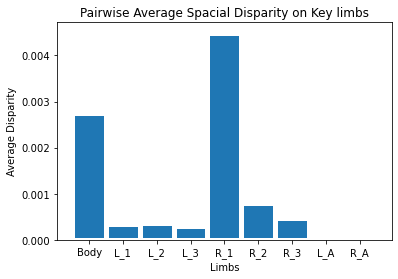

In [64]:
# plots PCK for different thresholds
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(parts_str, avgs, width=1, edgecolor="white", linewidth=5)

# ax.set(xlim=(-1, 8), xticks=np.arange(-1, 8),
#        ylim=(0, 1), yticks=np.arange(0, 0.5))
plt.title("Pairwise Average Spacial Disparity on Key limbs") 
plt.xlabel("Limbs")
plt.ylabel("Average Disparity")
plt.show()